<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados I
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Pacote Seaborn;</li>
  <li>Categorias: Gráficos de Barras e de Setores;</li>
  <li>Tendências: Gráficos de Linha e de Área.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preço do diamante por tipo de corte

In [38]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


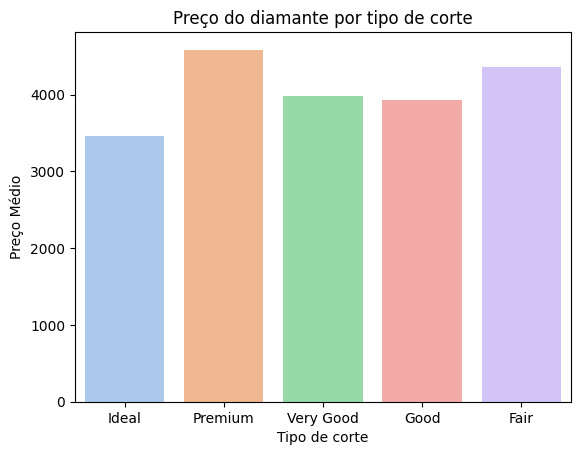

In [40]:
# gráfico do exercício 1

diamonds = data[['cut', 'price']].groupby('cut', observed=False).agg('mean').reset_index()

grafico = sns.barplot(data=diamonds, x='cut', y='price', errorbar=None, hue='cut', legend=False, palette='pastel')
grafico.set(title='Preço do diamante por tipo de corte', ylabel='Preço Médio', xlabel='Tipo de corte');

**Insight do gráfico 1**: O corte Premium se destaca sendo o mais caro, com um preço médio mais alto. O mercado valoriza mais esse tipo de corte, devido a sua qualidade.



---

## 2\. Número de passageiros em dezembro por ano

In [41]:
import seaborn as sns

data = sns.load_dataset("flights")
data.head(10)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
5,1949,Jun,135
6,1949,Jul,148
7,1949,Aug,148
8,1949,Sep,136
9,1949,Oct,119


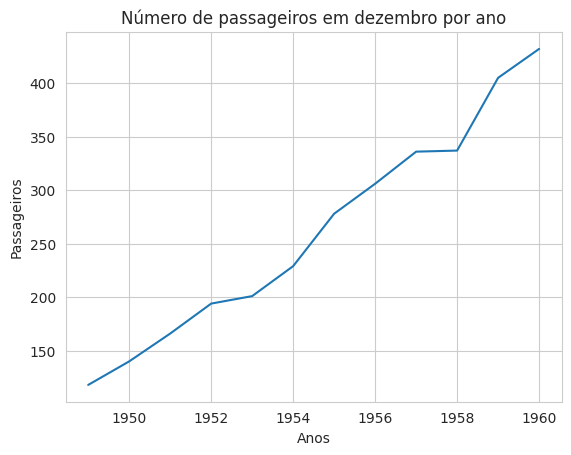

In [42]:
# gráfico do exercício 2

flights_dec = data[data['month'] == 'Dec']
flights = flights_dec[['year', 'passengers']].groupby('year').agg('sum').reset_index()

with sns.axes_style('whitegrid'):

    grafico = sns.lineplot(data=flights, x='year', y='passengers')
    grafico.set(title='Número de passageiros em dezembro por ano', xlabel='Anos', ylabel='Passageiros');




**Insight do gráfico 2**: O número de passageiros em dezembro apresenta um crescimento contínuo ao longo dos anos, indicando uma tendência de aumento que pode se intensificar no futuro.

---

## 3\. Numero de passageiros por mês entre 1949 e 1959

In [43]:
import seaborn as sns

data = sns.load_dataset("flights")
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


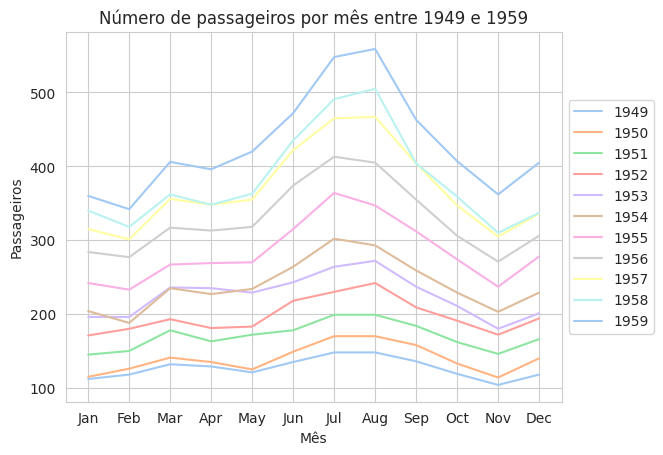

In [56]:
# gráfico do exercício 3

flights = data.query('1949 <= year <= 1959')

with sns.axes_style('whitegrid'):

    grafico = sns.lineplot(data=flights, x='month', y='passengers', hue='year', palette='pastel')
    grafico.set(title='Número de passageiros por mês entre 1949 e 1959', xlabel='Mês', ylabel='Passageiros');
    grafico.get_legend().set_title('Ano');
    grafico.legend(loc='center left', bbox_to_anchor=(1, 0.5))

**Insight do gráfico 3**: Nos últimos 10 anos, houve um grande aumento no número de passageiros, com um destaque para os meses de julho e agosto, que sempre tiveram o maior número de passageiros em cada ano. Isso indica que, durante o verão, a demanda por transporte é muito alta e consistente.

---